In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize'] = [15, 5]

In [15]:
df=pd.read_csv('Bit2c_BTCILS_1h.csv',header=1)

In [16]:
df.columns

Index(['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume BTC', 'Volume ILS'],
      dtype='object')

In [17]:
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume ILS
0,1.602500e+09,2020-10-12 11-AM,BTCILS,37754.11,37754.11,37754.11,37754.11,0.0000,0.00
1,1.602497e+09,2020-10-12 10-AM,BTCILS,38773.04,38773.04,37416.01,37754.11,0.3595,13621.88
2,1.602493e+09,2020-10-12 09-AM,BTCILS,38350.00,38773.04,38350.00,38773.04,1.2120,46614.06
3,1.602490e+09,2020-10-12 08-AM,BTCILS,38000.00,38350.00,38000.00,38350.00,0.2216,8464.14
4,1.602486e+09,2020-10-12 07-AM,BTCILS,37948.00,38000.00,37932.68,38000.00,1.6080,61077.92


In [18]:
numeric_cols = ['Open','High','Low','Close','Volume (BTC)','Volume (Currency)','Weighted Price']
converters={}#{'Timestamp':pd.to_datetime}
converters.update({col:pd.to_numeric for col in numeric_cols})
print(converters)
df_kraken=pd.read_csv('kraken_btc_usd.csv',sep='\t',converters={'Timestamp':pd.to_datetime})
df_kraken=df_kraken.set_index('Timestamp')

{'Open': <function to_numeric at 0x107f9e670>, 'High': <function to_numeric at 0x107f9e670>, 'Low': <function to_numeric at 0x107f9e670>, 'Close': <function to_numeric at 0x107f9e670>, 'Volume (BTC)': <function to_numeric at 0x107f9e670>, 'Volume (Currency)': <function to_numeric at 0x107f9e670>, 'Weighted Price': <function to_numeric at 0x107f9e670>}


In [19]:
df_kraken = df_kraken.apply(pd.to_numeric, errors = 'coerce').dropna()


In [20]:
df_kraken.columns = ['kraken_'+c for c in df_kraken.columns]
df_kraken.head()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price
Timestamp,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.62,13151.47,841.84
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.18,16097.33,839.16
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.16,6784.25,831.57
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.02,6780.22,844.94
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.75,16698.57,890.67


In [21]:
# for col,conv in converters.items():
#     df_kraken[col]=df_kraken[col].apply(conv,errors='coerce').dropna()
df_kraken.tail()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price
Timestamp,,,,,,,
2021-02-01,33121.8,34700.0,32325.3,33533.9,5477.65,1.844026e+08,33664.51
2021-02-02,33534.1,36000.0,33462.1,35500.0,6824.95,2.384845e+08,34943.01
2021-02-03,35500.0,37676.0,35394.8,37670.9,7014.22,2.569401e+08,36631.31
2021-02-04,37676.0,38735.1,36202.0,36979.0,7172.51,2.691370e+08,37523.39
2021-02-05,36975.8,38340.0,36582.9,37506.2,4047.69,1.523211e+08,37631.63


In [22]:
#df_bitstamp=pd.read_csv('bitstamp_btc_usd.csv',sep='\t')
df_bitstamp=pd.read_csv('bitstamp_btc_usd.csv',sep='\t',converters={'Timestamp':pd.to_datetime})
df_bitstamp= df_bitstamp.set_index('Timestamp')

In [23]:
df_bitstamp.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2011-09-13,5.8,6,5.65,5.97,58.37,346.1,5.93
2011-09-14,5.58,5.72,5.52,5.53,61.15,341.85,5.59
2011-09-15,5.12,5.24,5,5.13,80.14,408.26,5.09
2011-09-16,4.82,4.87,4.8,4.85,39.91,193.76,4.85
2011-09-17,4.87,4.87,4.87,4.87,0.3,1.46,4.87


In [24]:
df_bitstamp = df_bitstamp.apply(pd.to_numeric, errors = 'coerce').dropna()
df_bitstamp.columns = ['bitstamp_'+c for c in df_bitstamp.columns]
df_bitstamp.tail()

,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price
Timestamp,,,,,,,
2021-02-01,33110.32,34736.10,32333.01,33532.74,8374.06,2.829677e+08,33790.99
2021-02-02,33497.16,36008.67,33431.67,35522.16,7225.87,2.519012e+08,34861.05
2021-02-03,35496.91,37732.87,35382.45,37691.63,8777.33,3.216019e+08,36640.05
2021-02-04,37693.00,38748.52,36197.65,36996.32,11762.80,4.406163e+08,37458.44
2021-02-05,36984.28,38359.69,36618.36,37704.05,4590.59,1.730717e+08,37701.42


In [25]:
df_bitstamp.describe()

,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price
count,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000,3.413000e+03,3413.000000
mean,3733.631696,3850.130993,3605.327023,3744.576106,9770.536077,3.896862e+07,3730.051234
std,5528.258611,5738.026013,5296.378055,5558.099953,10114.988082,7.974551e+07,5521.915182
min,2.220000,2.270000,1.500000,2.240000,0.250000,1.230000e+00,2.240000
25%,233.500000,236.940000,228.290000,233.810000,3735.020000,1.521893e+06,233.430000
50%,647.160000,659.000000,626.090000,647.160000,7185.480000,6.685315e+06,641.270000
75%,6789.630000,7045.710000,6611.490000,6801.990000,12525.080000,4.647424e+07,6820.400000
max,40682.760000,42000.000000,38788.160000,40667.070000,137070.180000,1.369434e+09,40348.280000


<AxesSubplot:xlabel='Timestamp'>

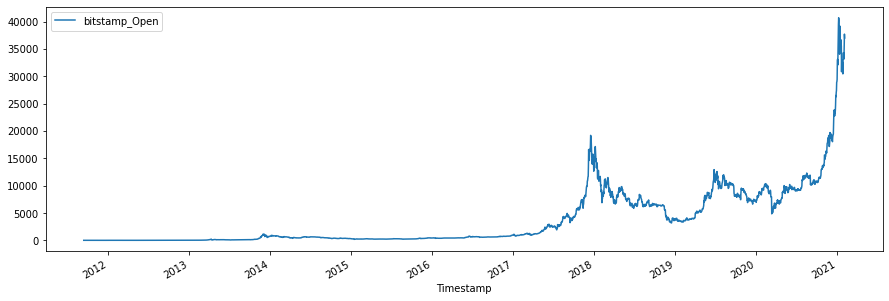

In [27]:
df_bitstamp.plot(y='bitstamp_Open')

In [29]:
df_bitstamp.describe()

,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price
count,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000,3.413000e+03,3413.000000
mean,3733.631696,3850.130993,3605.327023,3744.576106,9770.536077,3.896862e+07,3730.051234
std,5528.258611,5738.026013,5296.378055,5558.099953,10114.988082,7.974551e+07,5521.915182
min,2.220000,2.270000,1.500000,2.240000,0.250000,1.230000e+00,2.240000
25%,233.500000,236.940000,228.290000,233.810000,3735.020000,1.521893e+06,233.430000
50%,647.160000,659.000000,626.090000,647.160000,7185.480000,6.685315e+06,641.270000
75%,6789.630000,7045.710000,6611.490000,6801.990000,12525.080000,4.647424e+07,6820.400000
max,40682.760000,42000.000000,38788.160000,40667.070000,137070.180000,1.369434e+09,40348.280000


In [30]:
df_all = df_kraken.join(df_bitstamp, on=None, how='inner', sort=False)

In [31]:
df_all.head()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price
Timestamp,,,,,,,,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.62,13151.47,841.84,915.80,943.00,785.00,785.00,34063.52,29225267.96,857.96
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.18,16097.33,839.16,785.00,849.79,765.00,823.45,26315.76,21306391.42,809.64
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.16,6784.25,831.57,823.94,848.00,779.78,824.76,25302.24,20628555.65,815.29
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.02,6780.22,844.94,825.50,861.40,799.41,852.61,12846.16,10655064.16,829.44
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.75,16698.57,890.67,851.63,909.96,849.51,896.59,16130.92,14243532.40,883.00


In [32]:
df_all.tail()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price
Timestamp,,,,,,,,,,,,,,
2021-02-01,33121.8,34700.0,32325.3,33533.9,5477.65,1.844026e+08,33664.51,33110.32,34736.10,32333.01,33532.74,8374.06,2.829677e+08,33790.99
2021-02-02,33534.1,36000.0,33462.1,35500.0,6824.95,2.384845e+08,34943.01,33497.16,36008.67,33431.67,35522.16,7225.87,2.519012e+08,34861.05
2021-02-03,35500.0,37676.0,35394.8,37670.9,7014.22,2.569401e+08,36631.31,35496.91,37732.87,35382.45,37691.63,8777.33,3.216019e+08,36640.05
2021-02-04,37676.0,38735.1,36202.0,36979.0,7172.51,2.691370e+08,37523.39,37693.00,38748.52,36197.65,36996.32,11762.80,4.406163e+08,37458.44
2021-02-05,36975.8,38340.0,36582.9,37506.2,4047.69,1.523211e+08,37631.63,36984.28,38359.69,36618.36,37704.05,4590.59,1.730717e+08,37701.42


In [33]:
df_all['k-b_close']=df_all.kraken_Close-df_all.bitstamp_Close
df_all['k-b_open']=df_all.kraken_Open-df_all.bitstamp_Open
df_all['k-b_high']=df_all.kraken_High-df_all.bitstamp_High
df_all['k-b_low']=df_all.kraken_Low-df_all.bitstamp_Low
df_all['k-b_open_pct']=(df_all.kraken_Open-df_all.bitstamp_Open)/df_all.kraken_Open

#df_all=df_all.drop(['k-b_close]','k-b_open]','k-b_high]','k-b_low]',],axis=1)

In [34]:
df_all.head()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price,bitstamp_Open,bitstamp_High,bitstamp_Low,bitstamp_Close,bitstamp_Volume (BTC),bitstamp_Volume (Currency),bitstamp_Weighted Price,k-b_close,k-b_open,k-b_high,k-b_low,k-b_open_pct
Timestamp,,,,,,,,,,,,,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.62,13151.47,841.84,915.80,943.00,785.00,785.00,34063.52,29225267.96,857.96,25.00000,-41.12960,-50.93247,25.00000,-0.047023
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.18,16097.33,839.16,785.00,849.79,765.00,823.45,26315.76,21306391.42,809.64,1.53287,25.00000,50.05281,23.00000,0.030864
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.16,6784.25,831.57,823.94,848.00,779.78,824.76,25302.24,20628555.65,815.29,17.10934,1.62345,22.00000,27.64084,0.001966
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.02,6780.22,844.94,825.50,861.40,799.41,852.61,12846.16,10655064.16,829.44,4.72056,14.49000,-4.05944,17.59000,0.017250
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.75,16698.57,890.67,851.63,909.96,849.51,896.59,16130.92,14243532.40,883.00,3.25105,6.57000,8.09471,7.65554,0.007656


(-0.02, 0.02)

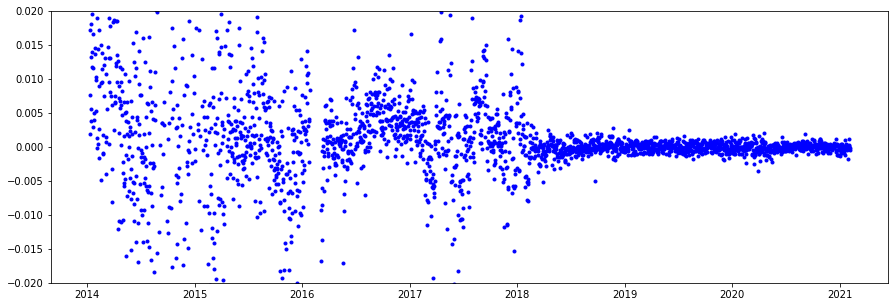

In [46]:
plt.plot(df_all['k-b_open_pct'],'b. ')
plt.ylim([-.02, .02])#plt.yscale('log')

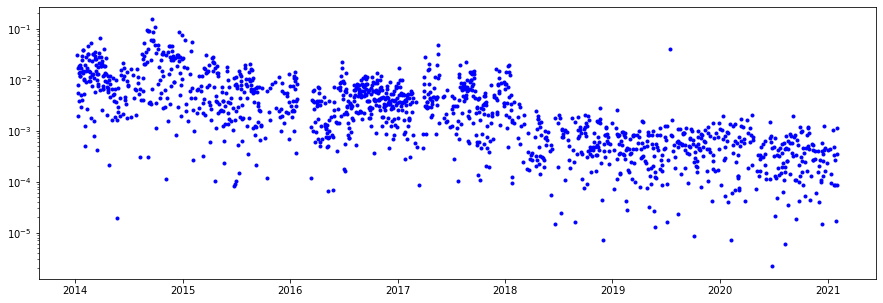

In [36]:
plt.plot(df_all['k-b_open_pct'],'b. ')
plt.yscale('log')

In [49]:
df_usd_nis = pd.read_csv('USD_NIS_HistoricalPrices.csv',sep=',',converters={'Date':pd.to_datetime})
df_usd_nis=df_usd_nis.set_index('Date')
df_usd_nis.columns=['USD_NIS_Open','USD_NIS_High','USD_NIS_Low','USD_NIS_Close',]

In [50]:
df_usd_nis.tail()

,USD_NIS_Open,USD_NIS_High,USD_NIS_Low,USD_NIS_Close
Date,,,,
2014-10-31,0.2675,0.2675,0.2636,0.2636
2014-10-30,0.2755,0.2755,0.2675,0.2675
2014-10-29,0.2755,0.2755,0.2656,0.2755
2014-10-28,0.2678,0.2755,0.2659,0.2755
2014-10-27,0.2646,0.2727,0.2646,0.2678


In [51]:
df_kra_bit_nis = df_all.join(df_usd_nis, on=None, how='inner', sort=False)

In [52]:
len(df_all)

2535

In [53]:
len(df_kra_bit_nis)

1598

In [54]:
df_kra_bit_nis.head()

,kraken_Open,kraken_High,kraken_Low,kraken_Close,kraken_Volume (BTC),kraken_Volume (Currency),kraken_Weighted Price,bitstamp_Open,bitstamp_High,bitstamp_Low,...,bitstamp_Weighted Price,k-b_close,k-b_open,k-b_high,k-b_low,k-b_open_pct,USD_NIS_Open,USD_NIS_High,USD_NIS_Low,USD_NIS_Close
2014-10-27,368.15412,368.15412,364.30000,364.30000,0.04,15.77,364.60,355.19,358.65,349.21,...,353.54,14.30000,12.96412,9.50412,15.09000,0.035214,0.2646,0.2727,0.2646,0.2678
2014-10-28,352.01024,365.12521,352.01024,365.12521,0.59,211.75,359.04,351.03,359.50,350.09,...,354.82,8.16521,0.98024,5.62521,1.92024,0.002785,0.2678,0.2755,0.2659,0.2755
2014-10-29,350.00001,350.00001,335.00987,335.06565,8.87,3050.00,343.73,355.71,355.99,333.33,...,343.85,-0.63435,-5.70999,-5.98999,1.67987,-0.016314,0.2755,0.2755,0.2656,0.2755
2014-10-30,335.00167,350.00000,335.00000,346.02084,7.56,2554.41,337.87,336.37,352.83,332.99,...,341.65,-0.11916,-1.36833,-2.83000,2.01000,-0.004085,0.2755,0.2755,0.2675,0.2675
2014-10-31,344.29000,347.95000,344.29000,347.95000,0.04,12.33,346.51,346.14,347.96,335.50,...,341.64,9.96000,-1.85000,-0.01000,8.79000,-0.005373,0.2675,0.2675,0.2636,0.2636


In [55]:
df_kra_bit_nis.columns

Index(['kraken_Open', 'kraken_High', 'kraken_Low', 'kraken_Close',
       'kraken_Volume (BTC)', 'kraken_Volume (Currency)',
       'kraken_Weighted Price', 'bitstamp_Open', 'bitstamp_High',
       'bitstamp_Low', 'bitstamp_Close', 'bitstamp_Volume (BTC)',
       'bitstamp_Volume (Currency)', 'bitstamp_Weighted Price', 'k-b_close',
       'k-b_open', 'k-b_high', 'k-b_low', 'k-b_open_pct', 'USD_NIS_Open',
       'USD_NIS_High', 'USD_NIS_Low', 'USD_NIS_Close'],
      dtype='object')

In [60]:
df_b2c= pd.read_csv('Bit2c_BTCILS_1h.csv',sep=',',header=1)# ,converters={'Unix Timestamp':pd.to_datetime}


In [62]:
df_b2c.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume ILS
0,1.602500e+09,2020-10-12 11-AM,BTCILS,37754.11,37754.11,37754.11,37754.11,0.0000,0.00
1,1.602497e+09,2020-10-12 10-AM,BTCILS,38773.04,38773.04,37416.01,37754.11,0.3595,13621.88
2,1.602493e+09,2020-10-12 09-AM,BTCILS,38350.00,38773.04,38350.00,38773.04,1.2120,46614.06
3,1.602490e+09,2020-10-12 08-AM,BTCILS,38000.00,38350.00,38000.00,38350.00,0.2216,8464.14
4,1.602486e+09,2020-10-12 07-AM,BTCILS,37948.00,38000.00,37932.68,38000.00,1.6080,61077.92
